In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
base_path = Path('/content/drive/MyDrive/Colab Notebooks/DANE LEKCJA 1')

In [5]:
titanic_df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')

In [12]:
print(titanic_df.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [17]:
titanic_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_df.shape

(891, 11)

In [21]:
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,98
Cabin,687


In [23]:
titanic_df.duplicated().sum()

np.int64(0)

Czyli jakbym mial podsumowac, to wygladalo by to tak, schludniej:


PODSTAWOWE INFO I SHAPE:

In [31]:
print("Info: \n", titanic_df.info())
print("Headzior: \n", titanic_df.head)
print("Szejpik: \n", titanic_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
Info: 
 None
Headzior: 
 <bound method NDFrame.head of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887        

unikatowe values

In [36]:
print("Unikatowe wartosci: \n", titanic_df.nunique().sort_values())
print("\n Typy Danych: \n", titanic_df.dtypes)

Unikatowe wartosci: 
 Survived      2
Sex           2
Pclass        3
Embarked      3
Parch         7
SibSp         7
Age          88
Cabin       147
Fare        236
Ticket      681
Name        891
dtype: int64

 Typy Danych: 
 Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


Braki danych

In [37]:
print("Braki danych: \n", titanic_df.isna().sum())
print("Procent wszystkich brakow: \n" , titanic_df.isna().mean() * 100)


Braki danych: 
 Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare         98
Cabin       687
Embarked      2
dtype: int64
Procent wszystkich brakow: 
 Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare        10.998878
Cabin       77.104377
Embarked     0.224467
dtype: float64


weryfikacja duplikatow

In [38]:
print("Duplikaty: \n", titanic_df.duplicated().sum())

Duplikaty: 
 0


Kolumna Survived

In [39]:
targeted_column = titanic_df['Survived']
print("Kolumna Survived: \n", targeted_column)

Kolumna Survived: 
 PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

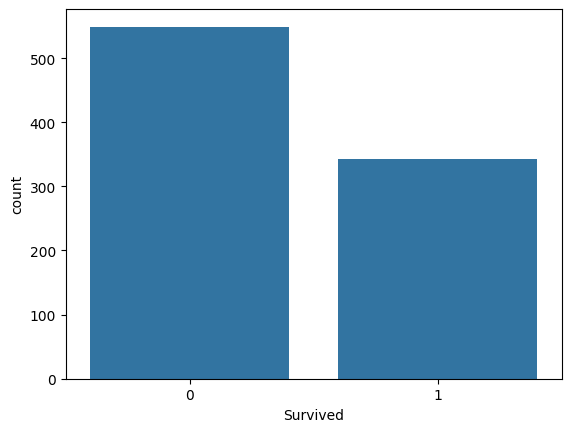

In [45]:
sns.countplot(x=targeted_column, data=titanic_df)
plt.show()

Na podstawie 4.1 ze sciagi

In [50]:
catalog_column = titanic_df.select_dtypes(include=['object']).columns.tolist()
print("Kolumna Catalog: \n", catalog_column)


Kolumna Catalog: 
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']



 rozklad wzgledem zmiennych kategorialnych


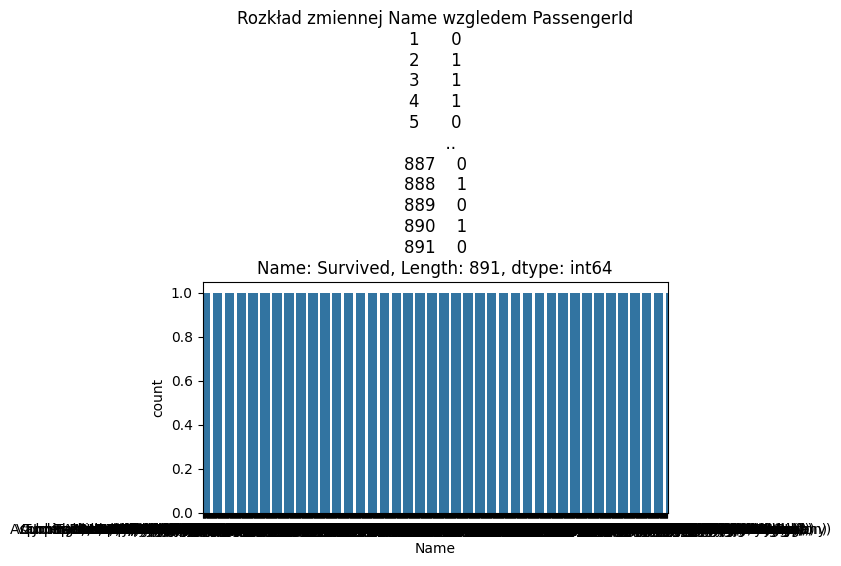

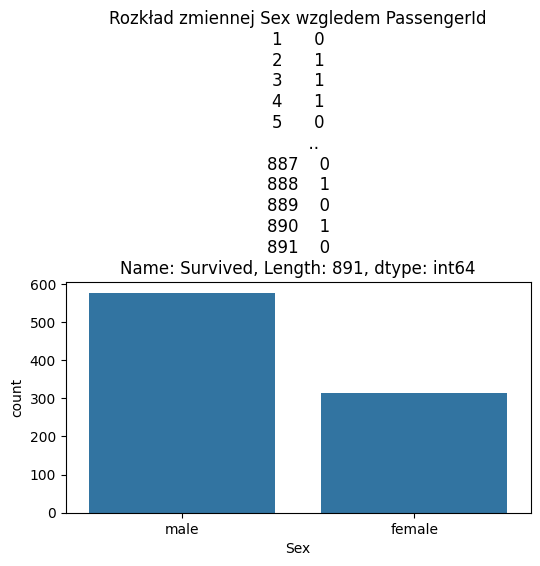

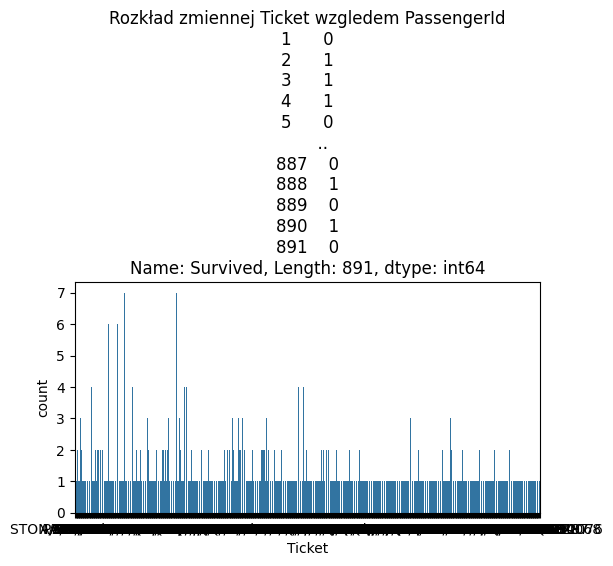

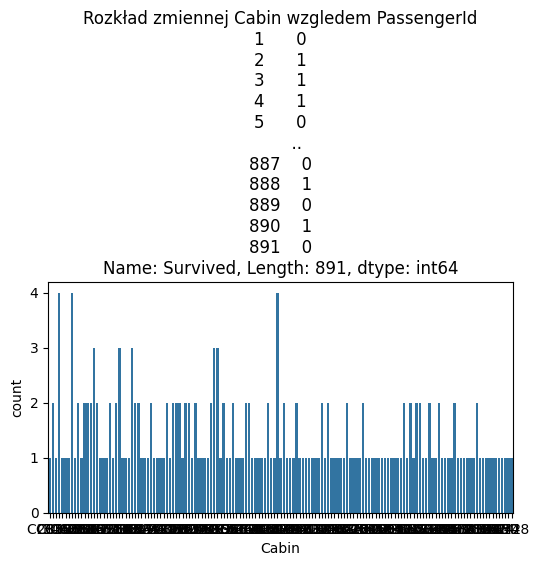

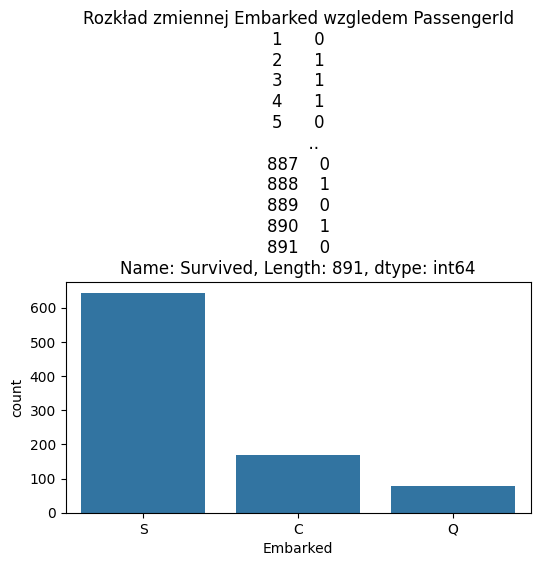

In [57]:

print("\n rozklad wzgledem zmiennych kategorialnych")
for i in catalog_column:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=i, data=titanic_df  )
    plt.title(f'Rozkład zmiennej {i} wzgledem {targeted_column}')
    plt.show()

nie wiem jak ladnie to wyswietlic na gorze soraweczka

tera numerycznosc - rozklad dla nich

In [58]:
numerical_columns = titanic_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Kolumna Numerical: \n", numerical_columns)

Kolumna Numerical: 
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


nie wiem czy o to chodzilo - znalazlem ze boxploty to narzędzia graficzne, którego używa się do wizualizacji rozkładu danych
statystycznych

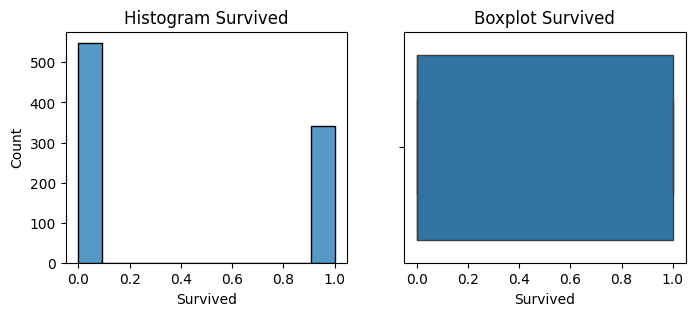

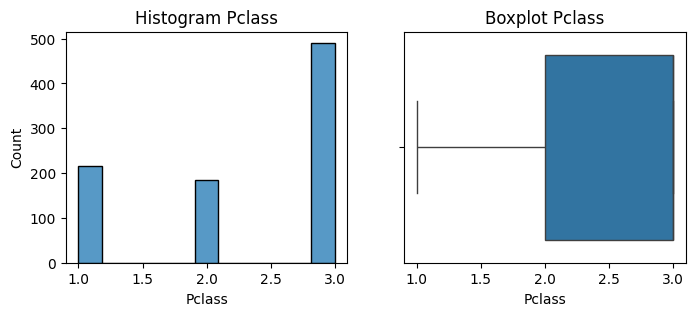

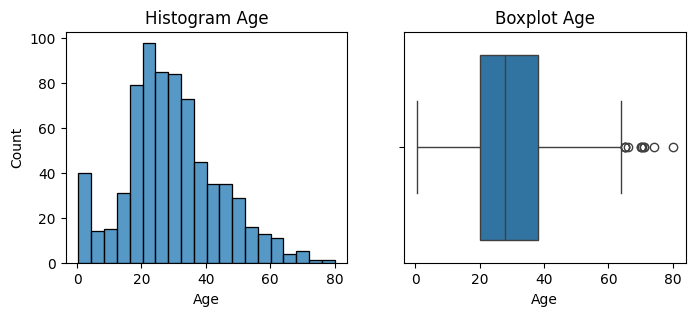

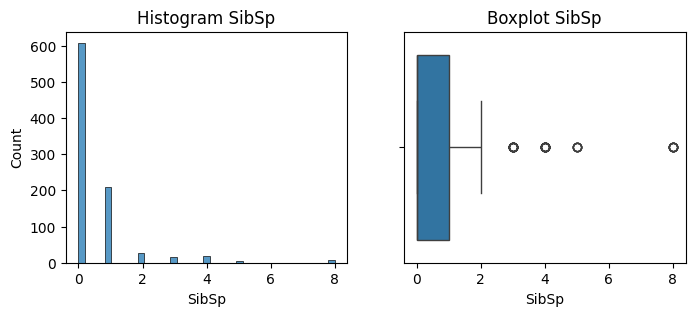

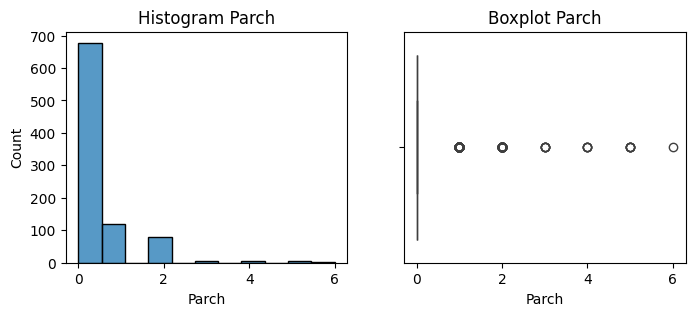

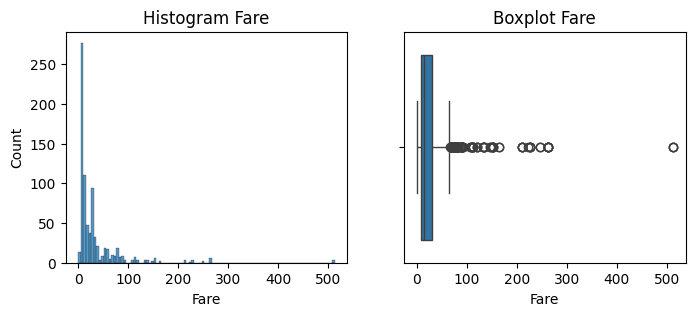

In [62]:
for i in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(8,3))
    sns.histplot(titanic_df[i].dropna(), ax=axes[0])
    axes[0].set_title(f"Histogram {i}")
    sns.boxplot(x=titanic_df[i], ax=axes[1])
    axes[1].set_title(f"Boxplot {i}")
    plt.show()


Nastepnie outliersy

In [64]:
print("ponizej wartosci skrajne: \n")
for i in numerical_columns:
    q1 = titanic_df[i].quantile(0.25)
    q3 = titanic_df[i].quantile(0.75)
    iqr = q3 - q1
    outliers = titanic_df[(titanic_df[i] < q1 - 1.5 * iqr) | (titanic_df[i] > q3 + 1.5 * iqr)]
    print(f"Outliers dla {i}:")
    print("\n Liczba wartosci skrajnych: \n", {len(outliers)})

ponizej wartosci skrajne: 

Outliers dla Survived:

 Liczba wartosci skrajnych: 
 {0}
Outliers dla Pclass:

 Liczba wartosci skrajnych: 
 {0}
Outliers dla Age:

 Liczba wartosci skrajnych: 
 {11}
Outliers dla SibSp:

 Liczba wartosci skrajnych: 
 {46}
Outliers dla Parch:

 Liczba wartosci skrajnych: 
 {213}
Outliers dla Fare:

 Liczba wartosci skrajnych: 
 {105}


Korrelacje:

In [69]:
korrelacja = titanic_df[numerical_columns].corr()
display(korrelacja)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.266819
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.546866
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.100115
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.156443
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.226834
Fare,0.266819,-0.546866,0.100115,0.156443,0.226834,1.000000


Jezeli chodzi o sugestie to nie mam pomyslu 😞